# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Analysis done by Brock Nosbisch
### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [375]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns; sns.set(color_codes=True)
from scipy import stats

In [376]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [377]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

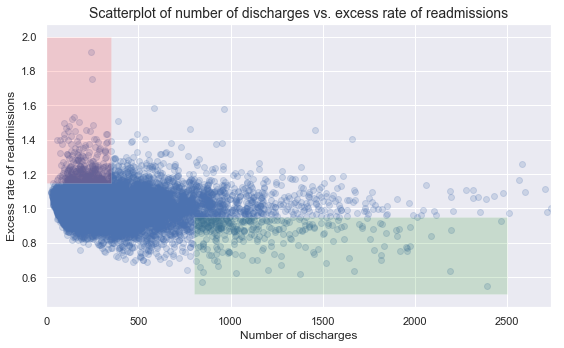

In [378]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [379]:
# Your turn

### Functions

In [380]:
def pearsonr_ci(x,y,alpha=0.05):

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    low_z, high_z = r_z-z*se, r_z+z*se
    low, high = np.tanh((low_z, high_z))
    return r, p, low, high


## A. Do you agree with the above analysis and recommendations? Why or why not?

There appears to be some missing analysis that should have been done.
* The "Statistics" section is only looking at hospitals with < 100 discharges and hospitals with > 1000 discharges.  But what about the 100 to 1000 range?
* The removal of Number of Discharges = 'Not Available' removes about 1/3 of the data but we will not be able to compare what the actual Discharged and Readmission values are so I agree with what they did.  I'm not sure why they kept # of Discharges = 0 that also have Number of Readmissions = 0.  I'm removing those from my analysis.
* The analysis is basing their results on 1 graph.  More analysis should have been done before coming up with a Conclusion. (Although my initial review shows that what is stated is true)
* The "Regulatory policy recommendations" suggests a solution for Hospitals with less than 300 capacity but where are they coming up with the # 300?  The analysis for discharges did not include the hospitals between 100 and 299.

In [381]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


### The removal of Number of Discharges = 'Not Available' removes about 1/3 of the data but we will not be able to compare what the actual Discharged and Excess Readmission Rate values are so I agree with what they did.  I'm not sure why they kept # of Discharges = 0 that also have Number of Readmissions = 0.  I'm removing those from my analysis.

In [382]:
print('Even though the above shows that there are no Null values for Number of Discharges, the analysis')
print('done shows that there are Not Available values.  All the Not Available values for Discharges also')
print('have the Excess Readmission Rate as Null.')
print('I agree with the initial analysis that those records should be dropped')
hospital_read_df[hospital_read_df['Number of Discharges'] == "Not Available"].head(5)

Even though the above shows that there are no Null values for Number of Discharges, the analysis
done shows that there are Not Available values.  All the Not Available values for Discharges also
have the Excess Readmission Rate as Null.
I agree with the initial analysis that those records should be dropped


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
62,DOCTORS HOSPITAL AT DEER CREEK LLC,190297,LA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.3287,6.2,4.7,NaN,07/01/2010,06/30/2013
92,PARK RIDGE HEALTH,340023,NC,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2941,5.7,4.4,NaN,07/01/2010,06/30/2013
94,MEADOWS REGIONAL MEDICAL CENTER,110128,GA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2915,6.1,4.7,NaN,07/01/2010,06/30/2013
103,WHEATON FRANCISCAN HEALTHCARE ST FRANCIS,520078,WI,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2844,8.0,6.2,NaN,07/01/2010,06/30/2013
111,CARNEY HOSPITAL,220017,MA,READM-30-HIP-KNEE-HRRP,Not Available,NaN,1.2782,7.3,5.7,NaN,07/01/2010,06/30/2013


In [383]:
print('Remove the Number of Discharges in for the DataFrame I am going to use.')
df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
df.info()

Remove the Number of Discharges in for the DataFrame I am going to use.
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 0 to 16857
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null object
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.1+ MB


In [384]:
print('There are still 81 Readmission records that have a Null value.')
print('Need to verify that these values do not have an associated Discharge value.')
print('I\'ve verified that all the Null # of Readmissions also have # of Discharges = 0 so we will remove these records.')
df[df['Number of Readmissions'].isnull()]


There are still 81 Readmission records that have a Null value.
Need to verify that these values do not have an associated Discharge value.
I've verified that all the Null # of Readmissions also have # of Discharges = 0 so we will remove these records.


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13762,P H S INDIAN HOSPITAL AT BROWNING - BLACKFEET,270074,MT,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13812,THE NEUROMEDICAL CENTER HOSPITAL,190266,LA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13845,DOCTORS HOSPITAL LLC,170194,KS,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13876,ROSELAND COMMUNITY HOSPITAL,140068,IL,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13897,SOUTH SHORE HOSPITAL,140181,IL,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13933,WESTERN MEDICAL CENTER HOSP ANAHEIM,50744,CA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
13990,HARMON HOSPITAL,290042,NV,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14006,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14066,HOSPITAL OF UNIV OF PENNSYLVANIA,390111,PA,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14074,LATIMER COUNTY GENERAL HOSPITAL,370072,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [385]:
print('Removing Number of Readmissions = null.  Also updating # of Discharges and Provider Number data types')
df = hospital_read_df[hospital_read_df['Number of Readmissions'].notnull()]
df = df.astype({'Number of Discharges':'int64', 'Provider Number':'object' })
df.info()


Removing Number of Readmissions = null.  Also updating # of Discharges and Provider Number data types
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null object
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.1+ MB


### The "Statistics" section is only looking at hospitals with < 100 discharges and hospitals with > 1000 discharges.  But what about the 100 to 1000 range?


Viewing the Number of Discharges by Bucket
0.10     98.0
0.25    160.0
0.50    282.0
0.75    474.0
0.90    726.4
Name: Number of Discharges, dtype: float64


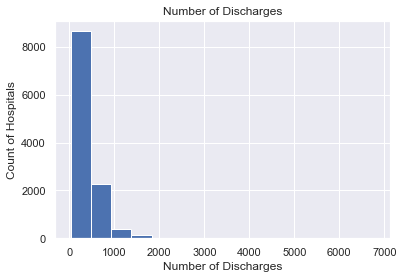

How many hospitals had Discharges over 2000?
Hospital Name                 32
Provider Number               32
State                         32
Measure Name                  32
Number of Discharges          32
Footnote                       0
Excess Readmission Ratio      32
Predicted Readmission Rate    32
Expected Readmission Rate     32
Number of Readmissions        32
Start Date                    32
End Date                      32
dtype: int64


Since we only have 32 hospitals over 2000 Discharges, let's view the same histogram as above but excluding > 2000 discharges.
By looking at the below histogram, we can see that the initial analysis done is excluding a good portion of the data by not evaluating the # of Discharges between 100 and 1000.


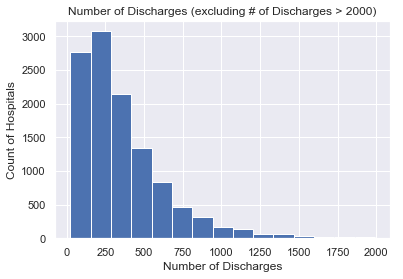

In [386]:
tmp = df['Number of Discharges'].quantile([.1, .25, .5, .75, .90])
print('Viewing the Number of Discharges by Bucket')
print(tmp)
_ = plt.hist(df['Number of Discharges'], bins=15, density=False)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Count of Hospitals')
_ = plt.title('Number of Discharges')
plt.show()

print('How many hospitals had Discharges over 2000?')
print(df[df['Number of Discharges'] > 2000].count())
print()
print()
print('Since we only have 32 hospitals over 2000 Discharges, let\'s view the same histogram as above but excluding > 2000 discharges.')
print('By looking at the below histogram, we can see that the initial analysis done is excluding a good portion of the data by not evaluating the # of Discharges between 100 and 1000.')
tmp=df[df['Number of Discharges'] <= 2000]

_ = plt.hist(tmp['Number of Discharges'], bins=15, density=False)
_ = plt.xlabel('Number of Discharges')
_ = plt.ylabel('Count of Hospitals')
_ = plt.title('Number of Discharges (excluding # of Discharges > 2000)')
plt.show()




Excess Readmission Ratio Quantiles
0.10    0.90406
0.25    0.95260
0.50    1.00350
0.75    1.05810
0.90    1.11280
Name: Excess Readmission Ratio, dtype: float64



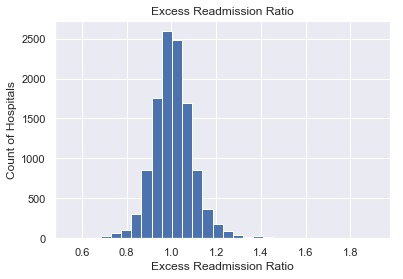

In [387]:
tmp = df['Excess Readmission Ratio'].quantile([.1, .25, .5, .75, .90])
print('Excess Readmission Ratio Quantiles')
print(tmp)
print()
_ = plt.hist(df['Excess Readmission Ratio'], bins=30, density=False)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Count of Hospitals')
_ = plt.title('Excess Readmission Ratio')
plt.show()

#### The correlation between Number of Discharges and Number of Readmissions 

In [388]:
print('Pearson Correlation')
print('We can see that # of Discharges and # of Readmissions are pretty correlated.')
df.corr(method='pearson')

Pearson Correlation
We can see that # of Discharges and # of Readmissions are pretty correlated.


,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Number of Discharges,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

### 1. Setup an appropriate hypothesis test.
    * Null Hypothesis: There is no significant correlation between # of Discharges and Excess Readmission Ratio.
    * Alternative Hypothesis: There is a significant correlation between # of Discharges and Excess Readmission Ratio.

### 2. Compute and report the observed significance value (or p-value).

#### Pearson Correlation


In [389]:
df.corr(method='pearson')

,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Number of Discharges,1.000000,NaN,-0.097398,-0.135163,-0.131091,0.791272
Footnote,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,-0.097398,NaN,1.000000,0.200039,-0.031104,0.117600
Predicted Readmission Rate,-0.135163,NaN,0.200039,1.000000,0.965420,0.361033
Expected Readmission Rate,-0.131091,NaN,-0.031104,0.965420,1.000000,0.330527
Number of Readmissions,0.791272,NaN,0.117600,0.361033,0.330527,1.000000


In [390]:
# Use Pearson calcuation to figure out p-value (also including r, r^2, ci)
r, p, low, high = pearsonr_ci(x=df['Number of Discharges'], y=df['Excess Readmission Ratio'], alpha=.05)

print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

p-value: 1.222547377680967e-25
r: -0.09739794351079355
r^2: 0.009486359400131731
CI: -0.11547185090583516 to -0.07925956430737344


#### Answer: P-value is very small (way less than .05) so we can reject the Null Hypothesis.  

### 3. Report statistical significance for  𝛼  = .01.

In [391]:
# Use Pearson calcuation to figure out p-value.
r, p, low, high = pearsonr_ci(x=df['Number of Discharges'], y=df['Excess Readmission Ratio'], alpha=.01)

print('p-value: ' + str(p))
print('r: ' + str(r))
print('r^2: ' + str(r**2))
print('CI: ' + str(low) + ' to ' + str(high))

p-value: 1.222547377680967e-25
r: -0.09739794351079355
r^2: 0.009486359400131731
CI: -0.12113590860828802 to -0.07354864167887253


#### Answer: P-value is the same where alpha = .05 and alpha = .01 since the p-value calculation does not include alpha.  Only the Confidence Interval will change since alpha is used in the calculation.  We can see the CI will be larger the lower the alpha is.  (alpha = .05 has a smaller CI than alpha = .01)

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

#### Statistical Significance refers to the unlikelihood that mean differences observed in the sample have occured due to sampling error.  Given a large enough sample, despite seemingly insignificant population differences, one might still find statistical significance.
#### Practical Significance looks at whether the difference is large enough to be of value in a practical sense.

### Answer: 
#### As mentioned previously, the Null Hypothesis that "there is no significant correlation between # of Discharges and Excess Readmission Ratio" was rejected because the p-value was significantly smaller than .05 (p < .05).  There is a significant correlation between # of Discharges and Excess Readmission Ratio.  So in short, there is Statistical Significance.
#### But when considering Practical Signficance, our r^2 was .00949 which means that the correlation accounts for < .01 (or 1%) of the variability in Excess Readmission Ratio is explained by # of Discharges.
#### There could be other, better, and more practical changes that can have a bigger impact on the end result rather than just saying that hospitals with a lower # of discharges need upgraded resource allocation for quality care and pushing for hospital consolidations.

### 5. Look at the scatterplot above. 
    - What are the advantages and disadvantages of using this plot to convey information?
    - Construct another plot that conveys the same information in a more direct manner.

#### Question: What are the advantages and disadvantages of using this plot to convey information?
#### Answers:
    - Advantages: 
        - Axis are clearly labeled
        - Title of graph seems okay (although I would not include 'Scatterplot of' wording)
    - Disadvantages: 
        - It is not clear what points are above and below Ratio = 1.0
        - I'm still unsure what the red and green boxes mean.

#### Question: Construct another plot that conveys the same information in a more direct manner.

In [392]:
# I copied the code from the Preliminary Analysis section and will update to use my DataFrame.
# deal with missing and inconvenient portions of data 
df = df.sort_values('Number of Discharges')

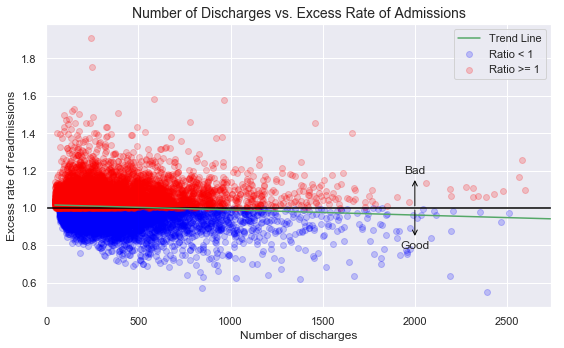

In [393]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function

# Ratio < 1.0
df1 = df[df['Excess Readmission Ratio'] < 1.0]
x = [a for a in df1['Number of Discharges'][81:-3]]
y = list(df1['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2,c='blue', label='Ratio < 1')

# Ratio >= 1.0
df2 = df[df['Excess Readmission Ratio'] >= 1.0]
x = [a for a in df2['Number of Discharges'][81:-3]]
y = list(df2['Excess Readmission Ratio'][81:-3])

ax.scatter(x, y,alpha=0.2,c='red', label='Ratio >= 1')

# Plot a straight line @ 1.0
ax.plot([0,3000], [1,1], 'black')

# Plot Trend Line
x = [a for a in df['Number of Discharges'][81:-3]]
y = list(df['Excess Readmission Ratio'][81:-3])
# slope, intercept, r, p, se = stats.linregress(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"g", label='Trend Line')

# Create labeling showing above 1.0 is bad, below is good.
ax.annotate('Bad', xy=(2000,1), xytext=(2000,1.2),
            arrowprops=dict(arrowstyle='<-', color='black'), ha='center', va='center')
ax.annotate('Good', xy=(2000,1), xytext=(2000,.8),
            arrowprops=dict(arrowstyle='<-', color='black'), ha='center', va='center')

# ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
# ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Number of Discharges vs. Excess Rate of Admissions', fontsize=14)
plt.legend()

ax.grid(True)
fig.tight_layout()

## ANNEX

In [394]:
print('Most of the Footnote values are Null but what does Footnote mean?')
print('Footnote appears to be populated only when Number of Readmissions, Excess Readmission Ratio, Predicted Readmission Rate, and Expected Readmission Rate are all Null.')
df[(df['Footnote'].notna()) & ((df['Number of Readmissions'].notna()) | (df['Expected Readmission Rate'].notna()) | (df['Predicted Readmission Rate'].notna()) | (df['Excess Readmission Ratio'].notna()))].head(15)


Most of the Footnote values are Null but what does Footnote mean?
Footnote appears to be populated only when Number of Readmissions, Excess Readmission Ratio, Predicted Readmission Rate, and Expected Readmission Rate are all Null.


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
